<a href="https://colab.research.google.com/github/ebudd45/Meteorologyclass/blob/main/anomalies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Magic to make Cartopy work-takes a few minutes
!pip install cartopy
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install -q -c conda-forge cartopy
import cartopy
cartopy.__version__


✨🍰✨ Everything looks OK!


'0.22.0'

In [2]:
#Install needed modules
!pip install metpy
!pip install cartopy
#!pip install siphon
!pip install netcdf4 h5netcdf

In [3]:
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pylab as plt
from metpy.units import units
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [4]:
year = input('Input year: ')

Input year: 2016


In [10]:
#read in data
temp = xr.open_dataset(f'http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis/Dailies/surface/air.sig995.{year}.nc')
ltm= xr.open_dataset('https://psl.noaa.gov/psd//thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/air.sig995.mon.ltm.nc')

/usr/local/lib/python3.10/site-packages/xarray/coding/times.py:832: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.10/site-packages/xarray/core/indexing.py:560: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()


In [6]:
temp

<xarray.Dataset>
Dimensions:    (time: 366, lon: 144, lat: 73, nbnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2016-12-31
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    air        (time, lat, lon) float32 ...
Attributes:
    Conventions:                     COARDS
    title:                           mean daily NMC reanalysis (2014)
    history:                         created 2013/12 by Hoop (netCDF2.3)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    DODS_EXTRA.Unlimited_Dimension:  time

In [11]:
sorted(list(temp.keys()))

['air', 'time_bnds']

In [12]:
#subset data to just 2016 and average
start_date = datetime(2016,1,1,0,0)
end_date =  datetime(2016,12,31,0,0)
temp_2016 = temp.air.metpy.sel(time = slice(start_date,end_date))

temp_2016_avr = np.nanmean(temp_2016, axis=0)

In [13]:
#select long tem data and find average

temp_91_20 = ltm.air.metpy.sel()

avr_91_20 = np.nanmean(temp_91_20,axis=0)


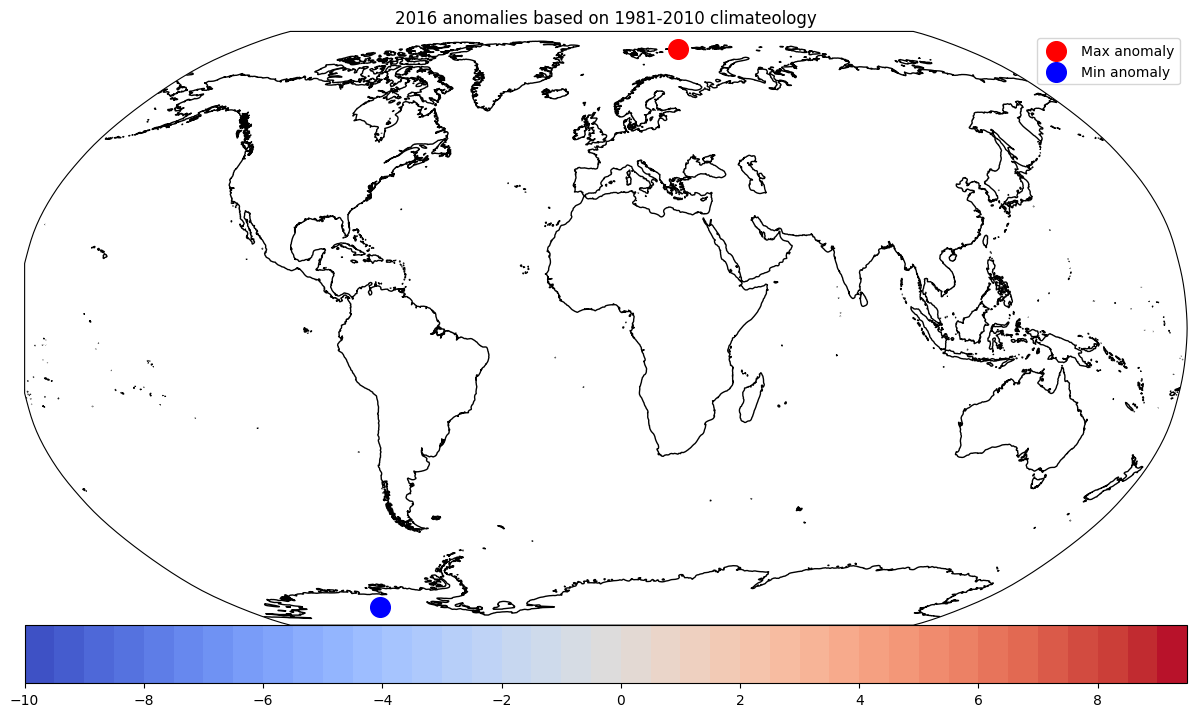

In [15]:
#calcuilate anomalies and plot anomaly map

anomaly_2016 = temp_2016_avr - avr_91_20

max_2016 = np.max(anomaly_2016)
min_2016 = np.min(anomaly_2016)

max_lat_2016, max_lon_2016 = np.where(anomaly_2016==max_2016)
min_lat_2016, min_lon_2016 = np.where(anomaly_2016==min_2016)

mapcrs = ccrs.Robinson()
fig = plt.figure(figsize=(15,13))

ax = fig.add_subplot(111, projection=mapcrs)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor = 'black')

cf = ax.contourf(temp_2016.lon, temp_2016.lat, anomaly_2016, levels = np.arange(-10,10,0.5),
                 cmap=plt.cm.coolwarm, transform = ccrs.PlateCarree())

cs = ax.contour(temp_2016.lon,temp_2016.lat, anomaly_2016, levels=np.arange(-10,10,0.5),
                colors = 'grey',linestyles = 'dotted', transform = ccrs.PlateCarree(),zorder=1)

ax.scatter(temp_2016.lon[max_lon_2016],temp_2016.lat[max_lat_2016],transform=ccrs.PlateCarree(),
           color = 'red', s = 200, label = 'Max anomaly', zorder=10)


ax.scatter(temp_2016.lon[min_lon_2016],temp_2016.lat[min_lat_2016],transform=ccrs.PlateCarree(),
           color = 'blue', s = 200, label = 'Min anomaly', zorder=10)


plt.colorbar(cf, pad=0,orientation='horizontal')

plt.clabel(cs, fmt='%d')
plt.legend()
plt.title('2016 anomalies based on 1981-2010 climateology')
plt.show()